# ЛР 2 Задача классификации. Последовательная нейронная сеть
## Жуйков Алексей Валерианович ИВТ 1.2


Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

## Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']
y_data = load_wine()['target']

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [ ]:
model = Sequential()

model.add(Dense(200, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,883 (19.07 KB)

 Trainable params: 4,863 (19.00 KB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3945 - loss: 1.0566 - val_accuracy: 0.2500 - val_loss: 8.3060
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5365 - loss: 0.8478 - val_accuracy: 0.2500 - val_loss: 5.0897
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5305 - loss: 0.8003 - val_accuracy: 0.3125 - val_loss: 2.8256
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5395 - loss: 0.8291 - val_accuracy: 0.2500 - val_loss: 3.8156
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6813 - loss: 0.7405 - val_accuracy: 0.4375 - val_loss: 2.1659
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6195 - loss: 0.7192 - val_accuracy: 0.5000 - val_loss: 1.6147
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6521 - loss: 0.7968 - val_accuracy: 0.5000 - val_loss: 1.4740
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6671 - loss: 0.7521 - val_accuracy: 0.5000 - val_loss:

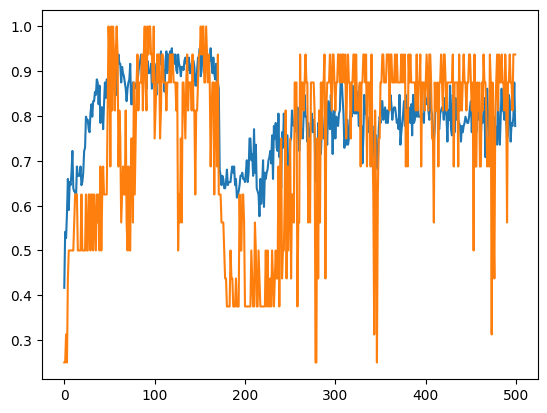

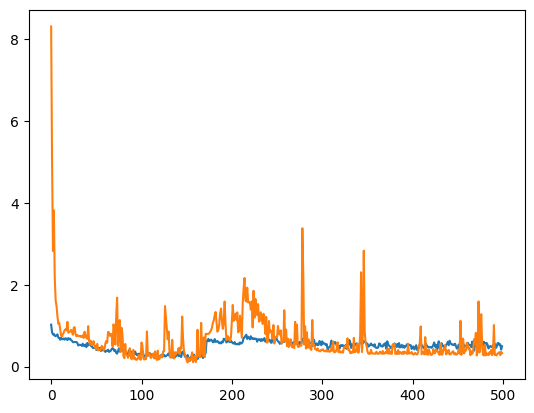

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 500,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9444 - loss: 0.2749


[0.27491697669029236, 0.9444444179534912]

In [ ]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 1, было 0, False
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True

 Процент верных предсказаний - 94.44444444444444 %
